# Analysis of Health Canada missing controlled substances and prescursors data, Jan. 1, 2012- Sept. 30, 2017

### Obtained by CBC News via Access to Information

Import analysis libraries.

In [1]:
import pandas as pd

In [2]:
import numpy as np

Read in raw data, name raw dataset "drugs."

In [3]:
drugs = pd.read_excel(r"C:\Users\CARMANT\Documents\Raw Data files\CBC\Opiod_Losses_RAW.xlsx")

Look at properties of dataset. There were 142,420 individual drug losses reported to Health Canada between Jan. 1, 2012 and Sept. 30, 2017.

In [4]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142420 entries, 0 to 142419
Data columns (total 8 columns):
LOSS_DATE        142420 non-null datetime64[ns]
PROV_CODE        142420 non-null object
DRUG_NAME        142420 non-null object
GENERIC_NAME     142419 non-null object
QUANTITY         142420 non-null float64
UNIT_CODE        142420 non-null object
LOSS_DESC        142420 non-null object
FACILITY_TYPE    142420 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.7+ MB


Isolating the year from the loss reported date and giving it its own column.

In [5]:
drugs["LOSS_YR"] = drugs["LOSS_DATE"].dt.year

The number of loss reports increased significantly between 2012 and 2017.

In [6]:
drugs.LOSS_YR.value_counts()

2017    62251
2016    35837
2015    16323
2014    11827
2012     8226
2013     7956
Name: LOSS_YR, dtype: int64

The different units the quantity of lost drugs is measured in, and the number of loss reports associated with each unit.

In [7]:
drugs.UNIT_CODE.value_counts()

TAB    102564
CAP     25481
MLS      8291
PAT      3099
GRA      1530
PKG       673
MG        527
PUM        87
SUP        75
MCG        43
LTS        26
KGS        10
PLT         5
SED         3
MF          2
OZ          2
GAL         1
HIT         1
Name: UNIT_CODE, dtype: int64

The locations where loss reports originated. By far the most loss reports originated at pharmacies.

In [8]:
drugs.FACILITY_TYPE.value_counts()

Pharmacy                   129180
Companies                    6102
Hospital                     5543
Licensed Producers           1347
Long Term Care Facility        80
Canadian Forces Base           61
Nurse Station                  59
Ambulatory Services            48
Name: FACILITY_TYPE, dtype: int64

Taking a closer look at some of the bigger loss reports; those measured in kilograms and litres.
Somehow 1,000 kg of pseudoephedrine, which is cold medication, went missing in two incidents within a week of each other somewhere in Ontario. I was suspicious this might be a duplicate, but Health Canada assures me that if loss reports are amended, or an unexplained loss is later determined to be a loss in transit, Health Canada will either zero or delete the initial record. So these appear to refer to two separate incidents.

In [9]:
drugs[drugs.UNIT_CODE == "KGS"]

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
1920,2012-03-01,QC,PENTOBARBITAL,PENTOBARBITAL,0.80,KGS,OTHER,Companies,2012
2739,2012-03-30,QC,PENTOBARBITAL,PENTOBARBITAL,2.40,KGS,OTHER,Companies,2012
51102,2016-03-30,QC,PSEUDOEPHEDRINE,PSEUDOEPHEDRINE,6.90,KGS,LOSS UNEXPLAINED,Companies,2016
51103,2016-03-30,QC,EPHEDRINE,EPHEDRINE,0.04,KGS,LOSS UNEXPLAINED,Companies,2016
57044,2016-05-17,ON,APO-HYDROMORPHONE 2 MG,HYDROMORPHONE,2.86,KGS,LOSS UNEXPLAINED,Companies,2016
76837,2016-11-25,ON,PSEUDOEPHEDRINE,PSEUDOEPHEDRINE,500.00,KGS,LOSS UNEXPLAINED,Companies,2016
76912,2016-12-01,ON,PSEUDOEPHEDRINE,PSEUDOEPHEDRINE,500.00,KGS,LOSS IN TRANSIT,Companies,2016
91218,2017-02-23,ON,HYDROCHLORIC ACID,HYDROCHLORIC ACID,22.00,KGS,LOSS UNEXPLAINED,Companies,2017
114671,2017-05-31,ON,LORAZEPAM,LORAZEPAM,6.66,KGS,LOSS UNEXPLAINED,Companies,2017
117317,2017-06-11,ON,LORAZEPAM,LORAZEPAM,0.05,KGS,LOSS UNEXPLAINED,Companies,2017


Losses measured in litres. More than 1,000 litres of liquid methadone was stolen from an Ontario pharmacy in an armed robbery in May 2017. Two days later an additional 22.5 libres of liquid methadone also went missing from a pharmacy in Ontario, this time the loss was unexplained.

In [10]:
litres = drugs[drugs.UNIT_CODE == "LTS"]
litres.head(26)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
2879,2012-04-03,ON,COACTIFED SYRUP,CODEINE,2.00,LTS,LOSS UNEXPLAINED,Companies,2012
2982,2012-04-12,AB,ROBITUSSIN AC 2MG/ML SYRUP,CODEINE,1.00,LTS,LOSS IN TRANSIT,Companies,2012
5498,2012-08-20,ON,ACETONE,ACETONE,48.00,LTS,LOSS IN TRANSIT,Companies,2012
9404,2013-03-08,SK,CODEINE SYRUP 5MG/ML,CODEINE,1.00,LTS,BREAK AND ENTRY,Pharmacy,2013
10836,2013-04-25,BC,METHADONE,METHADONE,1.00,LTS,BREAK AND ENTRY,Pharmacy,2013
21854,2014-06-30,ON,METHADONE,METHADONE,8.00,LTS,LOSS UNEXPLAINED,Pharmacy,2014
24154,2014-08-27,BC,METHADOSE 10 MG/ML,METHADONE,1.00,LTS,LOSS UNEXPLAINED,Companies,2014
24157,2014-08-27,BC,METHADOSE 10 MG/ML,METHADONE,2.00,LTS,LOSS UNEXPLAINED,Companies,2014
24768,2014-09-11,AB,RATIO-COTRIDIN EXP,CODEINE,32.00,LTS,LOSS UNEXPLAINED,Companies,2014
25178,2014-09-18,ON,METHADOSE 10 MG/ML,METHADONE,4.00,LTS,LOSS UNEXPLAINED,Companies,2014


Looking at the types of drugs measured using different unit codes: grams, milligrams, packages.

In [11]:
grams = drugs[drugs.UNIT_CODE == "GRA"]

Most records measured in grams refer to cannabis.

In [12]:
grams.GENERIC_NAME.value_counts()

CANNABIS                       1214
METHADONE                       109
TESTOSTERONE                     82
ANDROGEL                         32
KETAMINE                         25
COCAINE                           7
CODEINE                           6
OXYCODONE                         5
CANNABIDIOL                       5
PRASTERONE                        4
MORPHINE SULFATE                  4
FENTANYL                          4
PENTOBARBITAL                     4
PHENOBARBITAL                     3
OPIUM AND ITS PREPARATIONS        3
HYDROMORPHONE                     3
TETRAHYDROCANNABINOL              3
BARBITAL                          2
PSEUDOEPHEDRINE                   2
LORAZEPAM                         2
NABILONE                          2
TESTOSTERONE PROPIONATE           1
MARIHUANA ISOPROPYL ALCOHOL       1
BUTALBITAL                        1
PSEUDOEPHEDRINE HCL               1
HASH OIL                          1
METHYLPHENIDATE                   1
SUFENTANIL                  

Drugs measured in milligrams.

In [13]:
mg = drugs[drugs.UNIT_CODE == "MG"]

In [14]:
mg.GENERIC_NAME.value_counts()

METHADONE                                   121
HYDROMORPHONE                               110
MORPHINE                                     85
MIDAZOLAM                                    39
PSEUDOEPHEDRINE                              34
REMIFENTANIL HCL                             23
MORPHINE SULFATE                             14
FENTANYL                                     11
LORAZEPAM                                    10
KETAMINE                                      9
DIAZEPAM                                      7
CODEINE                                       6
NABILONE                                      6
NALBUPHINE                                    6
TESTOSTERONE                                  5
BUPRENORPHINE                                 5
PHENOBARBITAL                                 3
HYDROCODONE                                   3
ANDROGEL                                      3
DIACETYLMORPHINE                              2
CLONAZEPAM                              

Drugs measured in packages.

In [15]:
pkg = drugs[drugs.UNIT_CODE == "PKG"]

In [16]:
pkg.GENERIC_NAME.value_counts()

TESTOSTERONE                                197
HYDROMORPHONE                               101
MORPHINE                                     86
MIDAZOLAM                                    61
FENTANYL                                     59
ANDROGEL                                     33
TESTOSTERONE CYPIONATE                       19
TESTOSTERONE ENANTHATE                       16
LORAZEPAM                                    13
DIAZEPAM                                     13
CODEINE                                      11
CANNABIDIOL/DELTA-9-TETRAHYDROCANNABINOL     10
PETHIDINE                                     9
KETAMINE                                      8
PSEUDOEPHEDRINE HCL                           6
REMIFENTANIL HCL                              6
SUFENTANIL                                    5
METHADONE                                     4
MEDAZEPAM                                     3
PHENOBARBITAL                                 2
COCAINE                                 

## Cleaning the data

Checked generic drug names for duplicate spellings. Found hydromorphine, should be hydromorphone.

In [17]:
drugs[drugs["GENERIC_NAME"] =="HYDROMORPHINE"]

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
18929,2014-03-20,ON,HYDROMORPHINE,HYDROMORPHINE,13.0,CAP,LOSS UNEXPLAINED,Hospital,2014
90574,2017-02-20,AB,HYDROMORPHINE,HYDROMORPHINE,5.0,TAB,LOSS UNEXPLAINED,Ambulatory Services,2017


In [18]:
drugs.replace(to_replace="HYDROMORPHINE", value="HYDROMORPHONE", inplace=True)

In [19]:
drugs[drugs["GENERIC_NAME"] =="HYDROMORPHINE"]

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR


There were an unusual number of losses on July 29, 2017 in Saskatchewan, when more than 400,000 units of drugs were reported missing. The Saskatchewan College of Pharmacy Professionals says these loss reports are from one pharmacy and are the result of a new manager taking over who misreported the inventory. Health Canada allegedly audited the pharmacy and found no problems, according to the college. The College says no drugs went missing in Saskatchewan that day. 
Health Canada was unable to confirm this without an ATIP. Health Canada has received no amendments to the loss reports from the pharmacy that day, so these losses remain on their books. But since they were reported erroneously, I am dropping them from the analysis.

Assigning Saskatchewan its own dataframe.

In [20]:
sask = drugs[drugs.PROV_CODE == "SK"]

In [21]:
july_29_Sask = sask[sask.LOSS_DATE == "2017-07-29"]

Here are the losses reported in Saskatchewan on July 29, 2017.

In [22]:
sask[sask.LOSS_DATE == "2017-07-29"]

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
128849,2017-07-29,SK,CHLORDIAZEPOXIDE HCL,CHLORDIAZEPOXIDE HCL,2.0,CAP,LOSS UNEXPLAINED,Pharmacy,2017
128933,2017-07-29,SK,TESTOSTERONE,TESTOSTERONE,10.0,CAP,OTHER,Pharmacy,2017
128934,2017-07-29,SK,SUPEUDOL 20 MG,OXYCODONE,145.0,TAB,OTHER,Pharmacy,2017
128935,2017-07-29,SK,PERCOCET,OXYCODONE,80.0,TAB,OTHER,Pharmacy,2017
128936,2017-07-29,SK,OXYNEO 30MG/TAB,OXYCODONE,13540.0,TAB,OTHER,Pharmacy,2017
128937,2017-07-29,SK,APO-OXYCODONE CR 20 MG/TAB,OXYCODONE,80.0,TAB,OTHER,Pharmacy,2017
128938,2017-07-29,SK,PMS-OXYCODONE 10MG TAB,OXYCODONE,10.0,TAB,OTHER,Pharmacy,2017
128939,2017-07-29,SK,OXY-IR 10MG,OXYCODONE,24690.0,TAB,OTHER,Pharmacy,2017
128940,2017-07-29,SK,METADOL 10MG,METHADONE,38601.0,TAB,OTHER,Pharmacy,2017
128941,2017-07-29,SK,RATIO-LENOLTEC 4 TAB,CODEINE,126.0,TAB,OTHER,Pharmacy,2017


Dropping all losses from Saskatchewan on this day from the "drugs" dataframe. Renaming dataframe "drugs_cln."

In [23]:
drugs_cln = drugs.drop([128849, 128933, 128934, 128935, 128936, 128937, 128938, 128939, 128940, 128941, 128942, 128943, 128944, 128945, 128946, 128947, 128948, 128949, 128950, 128951, 128952, 128953, 128954, 128955, 128956, 128957, 128958, 128959])

These are the drugs measured in units that are comparable, such as tablets and capsules. Grouping these into a new dataframe called "units." Together these account for 93% of the loss reports in the data.

In [24]:
units = drugs_cln[(drugs_cln.UNIT_CODE == "TAB") | (drugs_cln.UNIT_CODE == "CAP") | (drugs_cln.UNIT_CODE == "PAT") | (drugs_cln.UNIT_CODE == "PKG") | (drugs_cln.UNIT_CODE == "SUP")]

In [25]:
units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131865 entries, 0 to 142418
Data columns (total 9 columns):
LOSS_DATE        131865 non-null datetime64[ns]
PROV_CODE        131865 non-null object
DRUG_NAME        131865 non-null object
GENERIC_NAME     131865 non-null object
QUANTITY         131865 non-null float64
UNIT_CODE        131865 non-null object
LOSS_DESC        131865 non-null object
FACILITY_TYPE    131865 non-null object
LOSS_YR          131865 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 10.1+ MB


In [26]:
units.head()

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
0,2012-01-01,AB,HYDROMORPH CONTIN 24MG CAP,HYDROMORPHONE,2.0,CAP,LOSS UNEXPLAINED,Hospital,2012
1,2012-01-02,MB,PHENOBARBITAL,PHENOBARBITAL,20.0,TAB,LOSS UNEXPLAINED,Pharmacy,2012
3,2012-01-02,AB,DEXEDRINE SPANSULE 10MG CAP,AMPHETAMINE,1.0,CAP,LOSS UNEXPLAINED,Pharmacy,2012
4,2012-01-02,AB,CESAMET 1MG,NABILONE,1.0,CAP,LOSS UNEXPLAINED,Pharmacy,2012
5,2012-01-02,AB,OXYCONTIN 5MG SRT,OXYCODONE,12.0,TAB,LOSS UNEXPLAINED,Pharmacy,2012


Up to this point I have only looked at the number of loss reports for each drug, not the quantities lost. Now that units are standardized it's possible to see how much of which kinds of drugs went missing.

In [27]:
quant = units.pivot_table(index="GENERIC_NAME",values="QUANTITY",aggfunc=np.sum)

By far the most units of oxycodone went missing. Codeine and hydromorphone are the second-tier. For everything else the numbers are much smaller. Notably fentanyl does not even crack the top 20.

In [28]:
quant.sort_values("QUANTITY", ascending=False)

,QUANTITY
GENERIC_NAME,
OXYCODONE,2289617.15
CODEINE,1671806.75
HYDROMORPHONE,1098638.45
LORAZEPAM,527254.20
MORPHINE,511059.00
METHYLPHENIDATE HCL,374163.50
CLONAZEPAM,354041.65
AMPHETAMINE,200615.00
METHYLPHENIDATE,181798.75


These are the biggest quantities lost in the data, sorted from biggest to smallest.

In [29]:
units.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
52131,2016-04-08,BC,OXYCODONE 5/MG TAB,OXYCODONE,165997.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
19487,2014-04-08,QC,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,86400.0,TAB,LOSS IN TRANSIT,Companies,2014
138646,2017-09-11,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,78491.0,TAB,PILFERAGE,Pharmacy,2017
72691,2016-08-30,BC,OXYCODONE,OXYCODONE,68510.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
34843,2015-06-28,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,59725.0,TAB,PILFERAGE,Pharmacy,2015
53717,2016-04-21,NL,PMS-OXYCODONE 20MG TAB,OXYCODONE,55400.0,TAB,PILFERAGE,Pharmacy,2016
21381,2014-06-09,ON,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,50400.0,TAB,BREAK AND ENTRY,Pharmacy,2014
14344,2013-09-28,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,32162.0,TAB,LOSS UNEXPLAINED,Pharmacy,2013
77435,2016-12-14,ON,HYDROMORPH CONTIN 24MG CAP,HYDROMORPHONE,24667.0,CAP,PILFERAGE,Pharmacy,2016
578,2012-01-20,ON,OXYCOCET,OXYCODONE,24536.0,TAB,PILFERAGE,Pharmacy,2012


How many units of drugs went missing in each year.

In [30]:
quant_year = units.pivot_table(index="LOSS_YR", values="QUANTITY",aggfunc=np.sum)

In [31]:
quant_year.head(6)

,QUANTITY
LOSS_YR,
2012,1105615.50
2013,1034422.36
2014,1425848.45
2015,1507547.39
2016,1821196.95
2017,1790483.19


The amount of drugs reported increased 62% between 2012 and 2017 (keeping in mind the data for 2017 is only until Sept 30 and therefore incomplete). Let's see how it looks on a line chart.

In [32]:
import matplotlib.pyplot as plt

Like a slightly bent hockey stick!

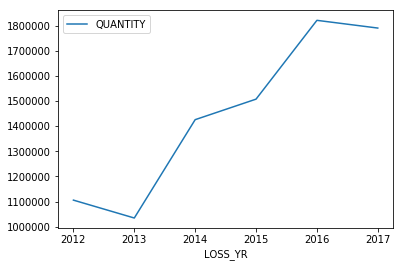

In [33]:
%matplotlib inline
quant_year.plot()

Where did the most drugs go missing from?

In [34]:
locations = units.pivot_table(index="LOSS_YR", columns="FACILITY_TYPE", values="QUANTITY",aggfunc=np.sum)

In [35]:
locations.head(6)

FACILITY_TYPE,Ambulatory Services,Canadian Forces Base,Companies,Hospital,Licensed Producers,Long Term Care Facility,Nurse Station,Pharmacy
LOSS_YR,,,,,,,,
2012,1.0,8.0,183164.0,11693.00,NaN,7.0,189.0,910553.50
2013,NaN,192.0,259008.5,20478.81,NaN,11.0,34.0,754698.05
2014,8.0,133.0,237650.7,16945.50,NaN,57.5,227.0,1170826.75
2015,16.0,87.5,195272.0,18463.25,NaN,85.0,51.0,1293572.64
2016,2.0,64.5,135823.0,36898.80,NaN,15.0,NaN,1648393.65
2017,10.0,323.0,56138.0,13745.75,2140.0,4614.0,490.0,1713022.44


It is losses from pharmacies that are driving this increase. Losses from hospitals are actually down.

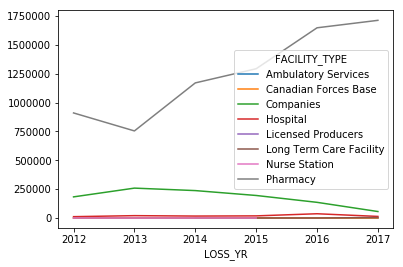

In [36]:
locations.plot()

Why are the drugs going missing?

In [37]:
reasons = units.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)

In [38]:
reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S DEFECTS (AMPOULES),MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE,UNDER SHIPMENT
LOSS_YR,,,,,,,,,,,,,,,
2012,355129.50,310672.0,65.0,78.0,15353.0,NaN,44731.0,203945.50,NaN,601.0,38684.50,10.0,136173.0,49.0,124.0
2013,299424.50,262260.0,NaN,NaN,19156.0,NaN,125796.0,224137.86,NaN,768.5,25471.50,NaN,77408.0,NaN,NaN
2014,379257.50,525579.5,30906.0,956.0,20975.0,304.0,125748.0,202741.45,NaN,242.0,10295.50,500.0,128242.5,1.0,100.0
2015,338002.25,468845.5,NaN,NaN,85189.0,240.0,58522.0,290580.14,1.0,2491.0,7099.00,331.0,256146.5,NaN,100.0
2016,263671.50,250678.5,1.0,4.0,13475.0,5819.0,41228.3,944423.65,1.0,209.0,47195.50,31.0,254241.5,34.0,184.0
2017,346671.00,185333.5,11.0,57.0,7006.0,540.0,17489.0,909732.24,1.0,330.5,186149.95,0.0,137081.5,80.5,NaN


In [39]:
units.groupby("LOSS_DESC").QUANTITY.sum()

LOSS_DESC
ARMED ROBBERY                                1982156.25
BREAK AND ENTRY                              2003369.00
BREAKAGE - IN TRANSIT                          30983.00
BREAKAGE - ON SITE                              1095.00
GRAB THEFT                                    161154.00
IMPERSONATION                                   6903.00
LOSS IN TRANSIT                               413514.30
LOSS UNEXPLAINED                             2775560.84
MANUFACTURER'S DEFECTS (AMPOULES)                  3.00
MANUFACTURER'S SHORTAGE (SEALED BOTTLES)        4642.00
OTHER                                         314895.95
OVER SHIPMENT (PICKING ERROR)                    872.00
PILFERAGE                                     989293.00
SPILLAGE                                         164.50
UNDER SHIPMENT                                   508.00
Name: QUANTITY, dtype: float64

In [40]:
units.QUANTITY.sum()

8685113.8399999999

In [41]:
from matplotlib import pylab

The biggest reason is "Loss Unexplained." But armed robbery, break and enter and grab theft (all essentially theft) account for more units lost if you add them together.

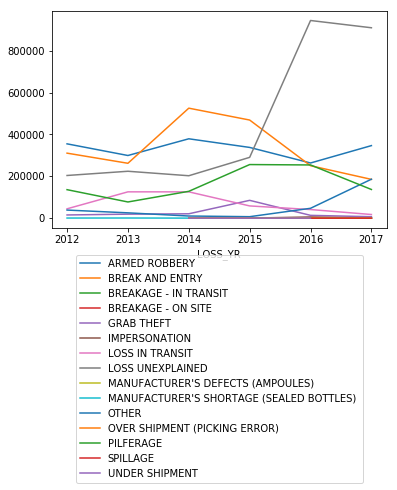

In [42]:
reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [43]:
reasons.head(20)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S DEFECTS (AMPOULES),MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE,UNDER SHIPMENT
LOSS_YR,,,,,,,,,,,,,,,
2012,355129.50,310672.0,65.0,78.0,15353.0,NaN,44731.0,203945.50,NaN,601.0,38684.50,10.0,136173.0,49.0,124.0
2013,299424.50,262260.0,NaN,NaN,19156.0,NaN,125796.0,224137.86,NaN,768.5,25471.50,NaN,77408.0,NaN,NaN
2014,379257.50,525579.5,30906.0,956.0,20975.0,304.0,125748.0,202741.45,NaN,242.0,10295.50,500.0,128242.5,1.0,100.0
2015,338002.25,468845.5,NaN,NaN,85189.0,240.0,58522.0,290580.14,1.0,2491.0,7099.00,331.0,256146.5,NaN,100.0
2016,263671.50,250678.5,1.0,4.0,13475.0,5819.0,41228.3,944423.65,1.0,209.0,47195.50,31.0,254241.5,34.0,184.0
2017,346671.00,185333.5,11.0,57.0,7006.0,540.0,17489.0,909732.24,1.0,330.5,186149.95,0.0,137081.5,80.5,NaN


In [44]:
reasons.to_csv("reasons.csv")

Isolating the five drugs that went missing in the highest quantities into one dataframe called "big."

In [45]:
big = units[(units.GENERIC_NAME == "OXYCODONE") | (units.GENERIC_NAME == "CODEINE") | (units.GENERIC_NAME == "HYDROMORPHONE") | (units.GENERIC_NAME == "LORAZEPAM") | (units.GENERIC_NAME == "MORPHINE")]

In [46]:
big_years = big.pivot_table(index="LOSS_YR", columns="GENERIC_NAME", values="QUANTITY",aggfunc=np.sum)
big_years.head(6)

GENERIC_NAME,CODEINE,HYDROMORPHONE,LORAZEPAM,MORPHINE,OXYCODONE
LOSS_YR,,,,,
2012,200015.00,154524.50,26480.0,86433.00,345102.00
2013,219502.50,136910.10,44081.0,71800.75,259779.00
2014,398887.50,215952.25,47374.0,93087.75,310916.45
2015,294822.50,220985.00,102335.5,90597.50,392880.75
2016,235506.50,184926.55,115590.5,77009.75,631992.00
2017,323072.75,185340.05,191393.2,92130.25,348946.95


Oxycodone had accounted for the highest quantity of losses but there was a big spike in hydromorphone going missing between 2016-17.

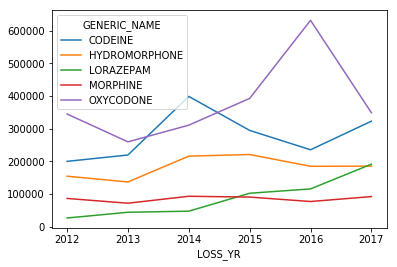

In [47]:
big_years.plot()

Looking at losses of fentanyl specifically.

In [48]:
fen = drugs[drugs.GENERIC_NAME == "FENTANYL"]

Fentanyl seems to be mostly sold in patches.

In [49]:
fen.UNIT_CODE.value_counts()

PAT    2684
MLS     347
PKG      59
TAB      49
MCG      32
MG       11
GRA       4
OZ        2
CAP       1
Name: UNIT_CODE, dtype: int64

In [50]:
fen.head()

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
10,2012-01-02,ON,TEVA-FENTANYL 50 MCG/HR,FENTANYL,40.0,PAT,ARMED ROBBERY,Pharmacy,2012
19,2012-01-02,ON,RAN-FENTANYL MATRIX PATCH 50MCG/HR,FENTANYL,5.0,PAT,ARMED ROBBERY,Pharmacy,2012
22,2012-01-02,ON,RAN-FENTANYL MATRIX PATCH 100MCG/HR,FENTANYL,15.0,PAT,ARMED ROBBERY,Pharmacy,2012
23,2012-01-02,ON,RAN-FENTANYL MATRIX PATCH 75MCG/HR,FENTANYL,5.0,PAT,ARMED ROBBERY,Pharmacy,2012
24,2012-01-02,ON,SANDOZ FENTANYL PATCH 12MCG/HR,FENTANYL,25.0,PAT,ARMED ROBBERY,Pharmacy,2012


In [51]:
fentanyl = units[units.GENERIC_NAME == "FENTANYL"]

In [52]:
fen_years = fentanyl.pivot_table(index="LOSS_YR",values="QUANTITY",aggfunc=np.sum)

Fentanyl not contributing to overall increase in losses. Fentanyl losses way down in 2017.

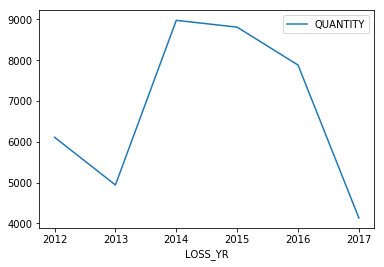

In [53]:
fen_years.plot()

In [54]:
fen_years.head(6)

,QUANTITY
LOSS_YR,
2012,6112.5
2013,4943.0
2014,8979.0
2015,8812.0
2016,7882.5
2017,4133.0


Looking specifically at the amounts of drugs that go missing in armed robberies and break and enters. Combining those into a new dataframe called "rob."

In [55]:
rob = units[(units.LOSS_DESC == "ARMED ROBBERY") | (units.LOSS_DESC == "BREAK AND ENTRY") | (units.LOSS_DESC == "GRAB THEFT")]
rob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25096 entries, 10 to 142294
Data columns (total 9 columns):
LOSS_DATE        25096 non-null datetime64[ns]
PROV_CODE        25096 non-null object
DRUG_NAME        25096 non-null object
GENERIC_NAME     25096 non-null object
QUANTITY         25096 non-null float64
UNIT_CODE        25096 non-null object
LOSS_DESC        25096 non-null object
FACILITY_TYPE    25096 non-null object
LOSS_YR          25096 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.9+ MB


In [56]:
rob.head()

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
10,2012-01-02,ON,TEVA-FENTANYL 50 MCG/HR,FENTANYL,40.0,PAT,ARMED ROBBERY,Pharmacy,2012
11,2012-01-02,ON,OXY-IR 5MG,OXYCODONE,139.0,TAB,ARMED ROBBERY,Pharmacy,2012
12,2012-01-02,ON,OXYCONTIN 40MG SRT,OXYCODONE,78.0,TAB,ARMED ROBBERY,Pharmacy,2012
13,2012-01-02,ON,HYDROMORPH CONTIN 30MG CAP,HYDROMORPHONE,156.0,CAP,ARMED ROBBERY,Pharmacy,2012
14,2012-01-02,ON,HYDROMORPH CONTIN 3MG CAP,HYDROMORPHONE,481.0,CAP,ARMED ROBBERY,Pharmacy,2012


These are the units of drugs stolen in armed robberies, grab thefts and break enters, grouped by generic name and sorted from most to fewest. Drugs stolen in armed robberies are generally the same ones that go missing in other ways.

In [57]:
rob.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                      970350.50
CODEINE                        938957.00
HYDROMORPHONE                  706871.00
MORPHINE                       365591.00
METHYLPHENIDATE HCL            218557.00
AMPHETAMINE                    127024.00
LORAZEPAM                      103506.00
METHYLPHENIDATE                 87692.50
PHENOBARBITAL                   83771.00
CLONAZEPAM                      66039.50
NABILONE                        57079.00
DIAZEPAM                        52753.00
DIPHENOXYLATE                   47427.00
LISDEXAMFETAMINE DIMESYLATE     45987.00
METHADONE                       39874.00
PETHIDINE                       33112.00
FENTANYL                        27369.50
ALPRAZOLAM                      26322.00
BUTABARBITAL                    20248.00
OXAZEPAM                        19657.00
TEMAZEPAM                       18626.00
CODEINE & BUTALBITAL            12431.00
TESTOSTERONE UNDECANOATE        10761.00
HYDROCODONE                      8287.50
BRO

In [58]:
rob.groupby("LOSS_YR").QUANTITY.sum()

LOSS_YR
2012    681154.50
2013    580840.50
2014    925812.00
2015    892036.75
2016    527825.00
2017    539010.50
Name: QUANTITY, dtype: float64

Quantities of drugs stolen in armed robberies and break and enters seem to have peaked in 2014 and have been declining since then. Especially codiene. Slight increase in the amount of hydromorphone stolen between 2016-17. Oxycodone the drug stolen in the highest quantities. These are the five generic drugs stolen in the greatest amounts.

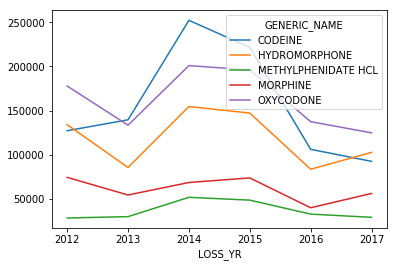

In [59]:
rob5 = rob[(rob.GENERIC_NAME == "OXYCODONE") | (rob.GENERIC_NAME == "HYDROMORPHONE") | (rob.GENERIC_NAME == "CODEINE") | (rob.GENERIC_NAME =="MORPHINE") | (rob.GENERIC_NAME == "METHYLPHENIDATE HCL")]
rob5_yrs = rob5.pivot_table(index="LOSS_YR", columns="GENERIC_NAME", values="QUANTITY",aggfunc=np.sum)
rob5_yrs.plot()

These are the amounts of drugs lost to pilferage, grouped by generic name from most to least. Oxycodone is by far the most common drug lost to pilferage, with hydromorphone a distant second.

In [60]:
pilf = units[units.LOSS_DESC == "PILFERAGE"]
pilf.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                      602967.5
HYDROMORPHONE                  147358.5
METHYLPHENIDATE HCL             39117.0
METHYLPHENIDATE                 32608.0
CODEINE                         32364.0
BUTABARBITAL                    17701.0
CLONAZEPAM                      16661.0
OXAZEPAM                        13100.0
LORAZEPAM                       12851.0
PETHIDINE                       10037.0
AMPHETAMINE                      9629.5
DIAZEPAM                         8773.0
MORPHINE                         8433.5
ALPRAZOLAM                       6916.0
FENTANYL                         6555.0
CODEINE & BUTALBITAL             6264.0
TRIAZOLAM                        2484.0
LISDEXAMFETAMINE DIMESYLATE      2418.0
TEMAZEPAM                        2027.0
BROMAZEPAM                       1549.0
PRASTERONE                       1439.0
PHENOBARBITAL                    1394.0
METHADONE                        1351.0
NABILONE                         1219.0
DIPHENOXYLATE              

## Regional differences

The number of units that went missing in each province. Ontario had the most units go missing but it is the province with the largest population and probably also has the most pharmacies. BC and Alberta seem to have lost a lot relative to their population and the figure for Quebec looks low.

In [61]:
units.groupby('PROV_CODE').QUANTITY.sum().sort_values(ascending=False)

PROV_CODE
ON          3754393.50
BC          1457114.30
AB          1061818.55
QC           910002.41
NL           448293.50
SK           355006.00
MB           343981.93
NS           188052.65
NB           124087.50
YT            24912.50
PE            14982.50
NU             1281.00
NT             1092.00
s.19             82.00
s.20(1)c         10.00
13                3.50
Name: QUANTITY, dtype: float64

Cleaning data to remove province codes that don't refer to provinces.

In [62]:
prov = ['ON', 'BC', 'AB', 'QC', 'SK', 'NS', 'MB', 'NL', 'NB', 'YT', 'PE', 'NT', 'NU']

In [63]:
units_prov = units[units.PROV_CODE.isin(prov)]

The number of drug units lost in each province by year. Ontario has seen the most significant increase, but there were also increases in Alberta, Saskatchewan, New Brunswick and Newfoundland. Losses in BC were increasing until 2016, but then sharply reversed course.

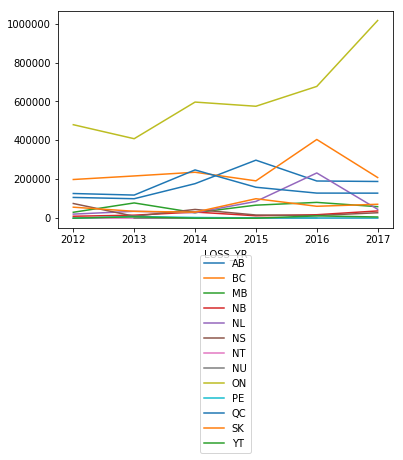

In [64]:
prov_years = units_prov.pivot_table(index='LOSS_YR', columns='PROV_CODE', values='QUANTITY', aggfunc=np.sum)
prov_years.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [65]:
prov_years.head(20)

PROV_CODE,AB,BC,MB,NB,NL,NS,NT,NU,ON,PE,QC,SK,YT
LOSS_YR,,,,,,,,,,,,,
2012,106570.50,198769.00,30338.00,9909.0,20845.5,75375.00,41.0,NaN,480488.5,2.0,126776.50,56454.5,42.0
2013,99966.25,217027.50,78328.00,15428.0,35225.5,9937.00,203.0,9.0,408442.8,8759.5,118740.81,35345.0,7010.0
2014,177386.00,236072.70,28239.50,31443.0,28026.5,44925.75,389.0,312.0,596775.0,3540.0,248028.50,30638.5,2.0
2015,298166.55,191850.75,66874.69,12392.0,86104.5,16256.65,151.0,100.0,575303.5,1433.0,158939.75,99972.0,1.0
2016,191074.50,404493.25,81140.75,17730.0,232402.0,13645.75,118.0,860.0,677282.1,661.0,128903.10,61128.5,11752.0
2017,188654.75,208901.10,59060.99,37185.5,45689.5,27912.50,190.0,NaN,1016101.6,587.0,128613.75,71467.5,6105.5


In [66]:
prov_years.to_csv("prov_years.csv")

To get a sense of which drugs are not being included in the unit analysis (which excludes those measured in millilitres and
milligrams) I wanted to check which of those drugs are lost in the largest quantities.

In [67]:
ml = drugs[drugs.UNIT_CODE == "MLS"]
ml.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
CODEINE                                     380759.06
METHADONE                                   198800.35
HYDROCODONE                                 182190.50
MORPHINE                                     74756.09
HYDROMORPHONE                                60528.03
FENTANYL                                     16037.50
PSEUDOEPHEDRINE HCL                          11164.00
MIDAZOLAM                                    10005.50
PHENOBARBITAL                                 9237.72
TETRAHYDROCANNABINOL                          8841.00
ACETIC ANHYDRIDE                              4880.00
CANNABIS                                      4651.50
PENTOBARBITAL                                 4235.60
PSEUDOEPHEDRINE                               3975.00
PIPRADROL HYDROCHLORIDE                       3387.00
KETAMINE                                      2562.31
TESTOSTERONE                                  2484.50
TESTOSTERONE CYPIONATE                        2121.00
DIAZEPAM       

In [68]:
mg.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
PSEUDOEPHEDRINE                             1430220.28
METHADONE                                    367341.87
HYDROMORPHONE                                 14904.89
PRASTERONE                                     9700.00
CANNABIDIOL/DELTA-9-TETRAHYDROCANNABINOL       4125.00
BUTALBITAL                                     3500.00
TESTOSTERONE                                   3300.00
MIDAZOLAM                                      2126.00
KETAMINE                                       1768.90
MORPHINE SULFATE                               1425.00
PENTOBARBITAL                                  1092.00
TESTOSTERONE ENANTHATE                         1015.00
CODEINE                                        1006.00
ANDROGEL                                        960.00
CLOBAZAM                                        950.00
NITRAZEPAM                                      900.00
MORPHINE                                        891.45
PETHIDINE                                       570.

How many units have been stolen in each province?

In [69]:
rob.groupby('PROV_CODE').QUANTITY.sum().sort_values(ascending=False)

PROV_CODE
ON    1624850.50
BC     748385.75
AB     702558.00
NL     277487.00
QC     269065.50
SK     227194.50
MB     140452.00
NS     103173.00
NB      33382.00
PE      13093.00
YT       7037.00
NT          1.00
Name: QUANTITY, dtype: float64

Ontario is the only province where the amounts being lost to armed robbery and theft have been increasing since 2016. BC used to be almost the same as Ontario but its numbers have plummeted.

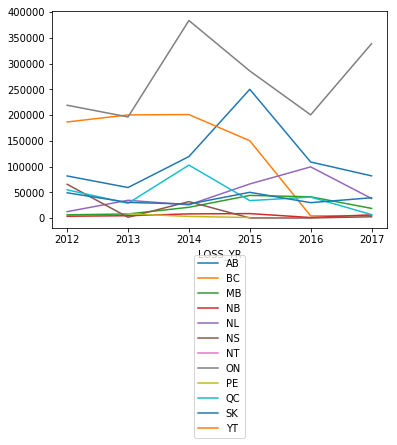

In [70]:
rob_prov = rob.pivot_table(index="LOSS_YR", columns='PROV_CODE', values='QUANTITY', aggfunc=np.sum)
rob_prov.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [71]:
rob_prov.head(6)

PROV_CODE,AB,BC,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
LOSS_YR,,,,,,,,,,,,
2012,81963.0,186783.00,6538.0,3759.0,12660.0,65770.0,NaN,219290.0,NaN,55094.0,49297.5,NaN
2013,59506.5,200477.50,8139.0,4758.0,34739.0,1731.0,NaN,196524.5,8475.0,28898.0,30625.0,6967.0
2014,119617.5,201168.50,21125.0,8321.0,25844.0,32177.0,NaN,383815.0,3331.0,103097.0,27316.0,NaN
2015,250210.0,150412.75,44204.0,8894.0,66446.0,415.0,1.0,285865.0,1287.0,34104.0,50198.0,NaN
2016,109106.5,4380.00,41482.0,1226.0,99615.5,340.0,NaN,200629.0,NaN,40934.5,30111.5,NaN
2017,82154.5,5164.00,18964.0,6424.0,38182.5,2740.0,NaN,338727.0,NaN,6938.0,39646.5,70.0


In [72]:
rob_prov['TOTAL'] = rob_prov.sum(axis=1)
rob_prov.head(6)

PROV_CODE,AB,BC,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT,TOTAL
LOSS_YR,,,,,,,,,,,,,
2012,81963.0,186783.00,6538.0,3759.0,12660.0,65770.0,NaN,219290.0,NaN,55094.0,49297.5,NaN,681154.50
2013,59506.5,200477.50,8139.0,4758.0,34739.0,1731.0,NaN,196524.5,8475.0,28898.0,30625.0,6967.0,580840.50
2014,119617.5,201168.50,21125.0,8321.0,25844.0,32177.0,NaN,383815.0,3331.0,103097.0,27316.0,NaN,925812.00
2015,250210.0,150412.75,44204.0,8894.0,66446.0,415.0,1.0,285865.0,1287.0,34104.0,50198.0,NaN,892036.75
2016,109106.5,4380.00,41482.0,1226.0,99615.5,340.0,NaN,200629.0,NaN,40934.5,30111.5,NaN,527825.00
2017,82154.5,5164.00,18964.0,6424.0,38182.5,2740.0,NaN,338727.0,NaN,6938.0,39646.5,70.0,539010.50


Amounts of drugs lost to pilferage per province, by loss year. This data looks seriously weird. Especially Newfoundland. Huge variations from year-to-year make me wonder about data quality.

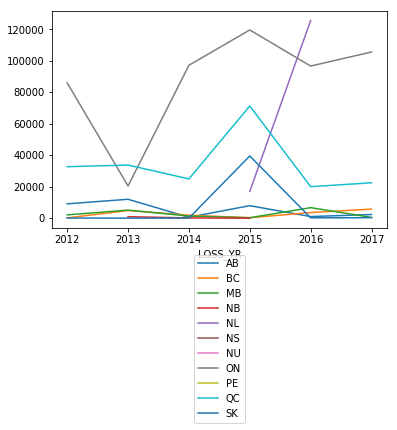

In [73]:
pilf_prov = pilf.pivot_table(index="LOSS_YR", columns='PROV_CODE', values='QUANTITY', aggfunc=np.sum)
pilf_prov.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [74]:
pilf_prov.head(6)

PROV_CODE,AB,BC,MB,NB,NL,NS,NU,ON,PE,QC,SK
LOSS_YR,,,,,,,,,,,
2012,9116.0,196.0,2099.0,NaN,NaN,5901.0,NaN,86024.0,NaN,32728.0,109.0
2013,12015.0,4851.0,5128.0,939.0,152.0,NaN,NaN,20446.5,104.5,33762.0,10.0
2014,576.0,1879.0,1363.5,150.0,NaN,2005.0,37.0,97209.0,NaN,24966.0,57.0
2015,7951.0,284.0,277.0,15.0,17069.0,NaN,NaN,119668.5,NaN,71327.0,39555.0
2016,1021.0,3562.0,6696.0,NaN,125678.0,340.0,NaN,96714.5,NaN,20016.0,214.0
2017,2329.0,5775.0,505.0,3.0,NaN,NaN,NaN,105659.0,NaN,22515.5,295.0


## Ontario

Putting Ontario in its own dataframe. Oxycodone more than twice as likely to go missing than any other drug in Ontario.

In [75]:
on = units[units.PROV_CODE == "ON"]
on.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                                    1222063.00
CODEINE                                       579982.00
HYDROMORPHONE                                 443959.30
LORAZEPAM                                     269410.20
MORPHINE                                      194027.00
METHYLPHENIDATE HCL                           155682.00
CLONAZEPAM                                    151053.15
AMPHETAMINE                                    65830.50
DIAZEPAM                                       55688.75
PSEUDOEPHEDRINE HCL                            55173.00
PHENOBARBITAL                                  53074.00
METHYLPHENIDATE                                47604.25
ALPRAZOLAM                                     45811.50
NABILONE                                       45574.00
LISDEXAMFETAMINE DIMESYLATE                    42286.50
OXAZEPAM                                       40049.50
TEMAZEPAM                                      36275.00
FENTANYL                           

Oxycodone driving the increased losses in Ontario. Nationally hydropmorphone losses surpassed oxycodone in 2017 but this is not the case in Ontario.

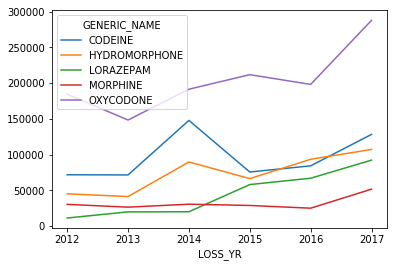

In [76]:
on_five = on[(on.GENERIC_NAME == "OXYCODONE") | (on.GENERIC_NAME == "CODEINE") | (on.GENERIC_NAME == "HYDROMORPHONE") | (on.GENERIC_NAME == "LORAZEPAM") | (on.GENERIC_NAME == "MORPHINE")]
on_five_yrs = on_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
on_five_yrs.plot()

In [77]:
on.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
138646,2017-09-11,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,78491.0,TAB,PILFERAGE,Pharmacy,2017
34843,2015-06-28,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,59725.0,TAB,PILFERAGE,Pharmacy,2015
21381,2014-06-09,ON,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,50400.0,TAB,BREAK AND ENTRY,Pharmacy,2014
14344,2013-09-28,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,32162.0,TAB,LOSS UNEXPLAINED,Pharmacy,2013
77435,2016-12-14,ON,HYDROMORPH CONTIN 24MG CAP,HYDROMORPHONE,24667.0,CAP,PILFERAGE,Pharmacy,2016
578,2012-01-20,ON,OXYCOCET,OXYCODONE,24536.0,TAB,PILFERAGE,Pharmacy,2012
28852,2015-01-19,ON,ATIVAN 0.5MG,LORAZEPAM,24000.0,TAB,LOSS UNEXPLAINED,Companies,2015
17658,2014-02-18,ON,DILAUDID 8 MG,HYDROMORPHONE,21479.0,TAB,PILFERAGE,Pharmacy,2014
579,2012-01-20,ON,OXYCONTIN 80MG SRT,OXYCODONE,19111.0,TAB,PILFERAGE,Pharmacy,2012
74671,2016-09-17,ON,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,18000.0,TAB,BREAK AND ENTRY,Pharmacy,2016


Vast majority of losses in Ontario from pharmacies.

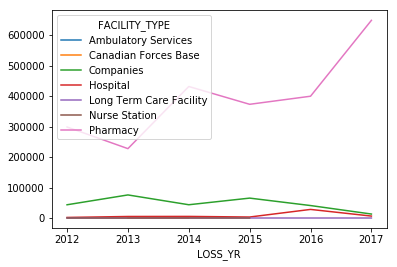

In [78]:
on_loc = on_five.pivot_table(index="LOSS_YR", columns='FACILITY_TYPE', values='QUANTITY', aggfunc=np.sum)
on_loc.plot()

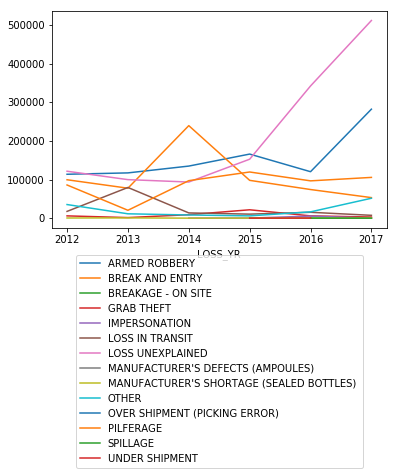

In [79]:
on_reasons = on.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
on_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [80]:
on_reasons.head()

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S DEFECTS (AMPOULES),MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE,UNDER SHIPMENT
LOSS_YR,,,,,,,,,,,,,,
2012,113790.0,99558.0,60.0,5942.0,NaN,17562.0,121665.5,NaN,442.0,35311.0,10.0,86024.0,NaN,124.0
2013,117335.5,77662.0,NaN,1527.0,NaN,79565.5,99853.8,NaN,732.5,11320.0,NaN,20446.5,NaN,NaN
2014,135003.5,239791.5,3.0,9020.0,124.0,13638.0,93654.5,NaN,56.0,8275.5,NaN,97209.0,NaN,NaN
2015,166100.0,98023.0,NaN,21742.0,240.0,10460.0,152805.0,1.0,222.0,5942.0,NaN,119668.5,NaN,100.0
2016,120424.5,74233.5,2.0,5971.0,5401.0,15266.5,342608.1,1.0,97.0,16353.0,NaN,96714.5,27.0,183.0


## Saskatchewan

Giving Saskatchewan its own dataframe. Hydromorphone more likely to go missing than any other drug.

In [81]:
sk = units[units.PROV_CODE == "SK"]

In [82]:
sk.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
HYDROMORPHONE                               99971.00
CODEINE                                     70735.50
MORPHINE                                    32707.00
OXYCODONE                                   27954.50
METHYLPHENIDATE HCL                         16502.50
DIAZEPAM                                    16138.25
CLONAZEPAM                                  14267.75
LORAZEPAM                                   12582.00
METHYLPHENIDATE                              9018.50
AMPHETAMINE                                  8894.00
PHENOBARBITAL                                6951.00
TEMAZEPAM                                    5276.00
DIPHENOXYLATE                                4880.00
ALPRAZOLAM                                   4867.00
OXAZEPAM                                     4743.50
LISDEXAMFETAMINE DIMESYLATE                  3441.00
PETHIDINE                                    2729.00
METHADONE                                    2099.50
FENTANYL                         

Reported hydromorphone losses in Saskatchewan spiked in 2017. This is likely what's behind a lot of the national increase in hydropmorphone losses.

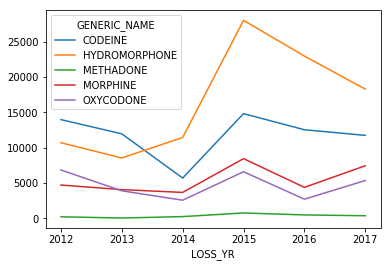

In [83]:
sk_five = sk[(sk.GENERIC_NAME == "OXYCODONE") | (sk.GENERIC_NAME == "CODEINE") | (sk.GENERIC_NAME == "HYDROMORPHONE") | (sk.GENERIC_NAME == "METHADONE") | (sk.GENERIC_NAME == "MORPHINE")]
sk_five_yrs = sk_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
sk_five_yrs.plot()

In [84]:
sk_five_yrs.head(6)

GENERIC_NAME,CODEINE,HYDROMORPHONE,METHADONE,MORPHINE,OXYCODONE
LOSS_YR,,,,,
2012,13973.0,10702.0,212.0,4710.0,6844.0
2013,11961.0,8545.0,43.0,4062.0,3896.0
2014,5701.0,11444.5,244.0,3666.0,2563.0
2015,14820.0,28026.5,756.0,8446.0,6593.0
2016,12538.0,22968.0,479.5,4382.0,2708.0
2017,11742.5,18285.0,365.0,7441.0,5350.5


In [85]:
sk.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
65092,2016-07-06,SK,DILAUDID 4 MG,HYDROMORPHONE,4885.00,TAB,LOSS UNEXPLAINED,Pharmacy,2016
65094,2016-07-06,SK,APO-HYDROMORPHONE 4 MG,HYDROMORPHONE,4444.00,TAB,LOSS UNEXPLAINED,Pharmacy,2016
31780,2015-04-01,SK,PMS CLONAZEPAM R 0.5MG TAB,CLONAZEPAM,2957.00,TAB,PILFERAGE,Pharmacy,2015
31784,2015-04-01,SK,APODIAZEPAM 10MG,DIAZEPAM,2714.00,TAB,PILFERAGE,Pharmacy,2015
31771,2015-04-01,SK,SANIS-OXYCODONE ACET,OXYCODONE,1963.00,TAB,PILFERAGE,Pharmacy,2015
31782,2015-04-01,SK,APOOXAZEPAM 15MG,OXAZEPAM,1936.00,TAB,PILFERAGE,Pharmacy,2015
12533,2013-07-07,SK,DILAUDID 4 MG,HYDROMORPHONE,1422.00,TAB,ARMED ROBBERY,Pharmacy,2013
18417,2014-03-10,SK,RATIO-LENOLTEC 3 TAB,CODEINE,1387.00,TAB,BREAK AND ENTRY,Pharmacy,2014
74975,2016-09-21,SK,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,1350.00,TAB,LOSS UNEXPLAINED,Pharmacy,2016
40700,2015-10-29,SK,LORAZEPAM 1 MG TAB,LORAZEPAM,1348.00,TAB,ARMED ROBBERY,Pharmacy,2015


In [86]:
sk.groupby("LOSS_YR").QUANTITY.sum()

LOSS_YR
2012    56454.5
2013    35345.0
2014    30638.5
2015    99972.0
2016    61128.5
2017    71467.5
Name: QUANTITY, dtype: float64

Most losses from pharmacies in Saskatchewan as well.

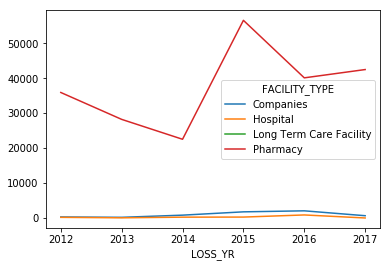

In [87]:
sk_loc = sk_five.pivot_table(index="LOSS_YR", columns='FACILITY_TYPE', values='QUANTITY', aggfunc=np.sum)
sk_loc.plot()

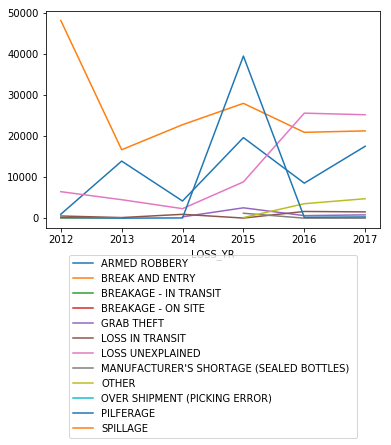

In [88]:
sk_reasons = sk.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
sk_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [89]:
sk_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE
LOSS_YR,,,,,,,,,,,,
2012,960.0,48233.5,NaN,NaN,104.0,530.0,6466.00,30.0,22.00,NaN,109.0,NaN
2013,13926.0,16699.0,NaN,NaN,NaN,150.0,4510.00,NaN,50.00,NaN,10.0,NaN
2014,4186.0,22804.0,NaN,NaN,326.0,942.5,2323.00,NaN,NaN,NaN,57.0,NaN
2015,19656.0,28015.0,NaN,NaN,2527.0,25.0,8850.00,1202.0,142.00,NaN,39555.0,NaN
2016,8543.0,20948.5,1.0,NaN,620.0,1639.0,25625.00,5.0,3532.00,NaN,214.0,1.0
2017,17543.0,21296.5,NaN,3.0,807.0,1530.0,25236.75,8.0,4748.25,0.0,295.0,NaN


In [90]:
sk.to_csv("sk.csv")

## B.C.

Giving BC its own dataframe. Overall losses in BC pretty consistent with national pattern.

In [91]:
bc = units[units.PROV_CODE == "BC"]
bc.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                      436579.40
CODEINE                        335395.00
HYDROMORPHONE                  142090.75
MORPHINE                        89740.00
LORAZEPAM                       69082.00
METHYLPHENIDATE HCL             51436.50
CLONAZEPAM                      49349.00
AMPHETAMINE                     46985.50
ALPRAZOLAM                      45917.00
METHYLPHENIDATE                 26316.00
DIAZEPAM                        22597.50
PHENOBARBITAL                   15264.75
OXAZEPAM                        15031.00
NABILONE                        13790.00
DIPHENOXYLATE                   13423.00
LISDEXAMFETAMINE DIMESYLATE     11588.00
TEMAZEPAM                       10592.00
PETHIDINE                       10307.50
EPHEDRINE HCL                    7825.00
METHADONE                        6821.00
CLOBAZAM                         5301.00
TRIAZOLAM                        3885.00
BUTABARBITAL                     3771.00
BUPRENORPHINE                    3173.95
COD

In [92]:
bc.to_csv("bc.csv")

Oxycodone losses in BC appear to have spiked in 2016 and then dropped off in 2017.

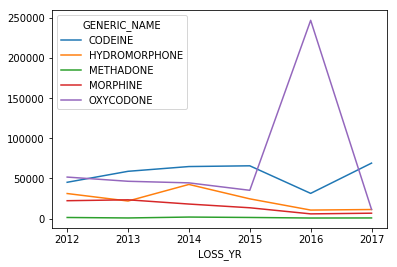

In [93]:
bc_five = bc[(bc.GENERIC_NAME == "OXYCODONE") | (bc.GENERIC_NAME == "CODEINE") | (bc.GENERIC_NAME == "HYDROMORPHONE") | (bc.GENERIC_NAME == "METHADONE") | (bc.GENERIC_NAME == "MORPHINE")]
bc_five_yrs = bc_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
bc_five_yrs.plot()

In [94]:
bc_five_yrs.head(6)

GENERIC_NAME,CODEINE,HYDROMORPHONE,METHADONE,MORPHINE,OXYCODONE
LOSS_YR,,,,,
2012,45243.0,31219.50,1350.0,22263.0,51734.0
2013,58936.0,21867.00,758.0,23381.0,46499.5
2014,64871.0,42563.50,1877.0,18099.0,44522.7
2015,65789.0,24584.00,1370.0,13460.5,35234.5
2016,31412.5,10589.25,690.0,5845.0,247204.5
2017,69143.5,11267.50,776.0,6691.5,11384.2


There were two massive oxycodone losses from pharmacies in 2016 that seem to have driven the spike that year, one April 8 and one Aug 30. Both unexplained.

In [95]:
bc.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
52131,2016-04-08,BC,OXYCODONE 5/MG TAB,OXYCODONE,165997.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
72691,2016-08-30,BC,OXYCODONE,OXYCODONE,68510.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
53416,2016-04-19,BC,MYLAN-ALPRAZOLAM 2MG,ALPRAZOLAM,17353.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
72690,2016-08-30,BC,MYLAN-ALPRAZOLAM 2MG,ALPRAZOLAM,14420.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
104345,2017-04-20,BC,VITA ACETAMINOPHEN W/ CAFFEINE AND CODEINE 8 M...,CODEINE,13200.0,CAP,OTHER,Pharmacy,2017
350,2012-01-12,BC,TYLENOL 3,CODEINE,9259.0,TAB,ARMED ROBBERY,Pharmacy,2012
12384,2013-07-03,BC,EQUATE ACETAMINOPHEN W CAFFEINE AND CODEINE 8M...,CODEINE,7200.0,TAB,BREAK AND ENTRY,Companies,2013
14063,2013-09-12,BC,EPHEDRINE 8MG TAB,EPHEDRINE HCL,7200.0,TAB,GRAB THEFT,Companies,2013
10431,2013-04-10,BC,TYLENOL 3,CODEINE,5000.0,TAB,ARMED ROBBERY,Pharmacy,2013
31920,2015-04-14,BC,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,4800.0,TAB,LOSS IN TRANSIT,Companies,2015


Losses in BC attributed to armed robbery and break and enters essentially ceased after 2015. Unexplained losses increase in 2016 due to the two massive oxycodone losses.

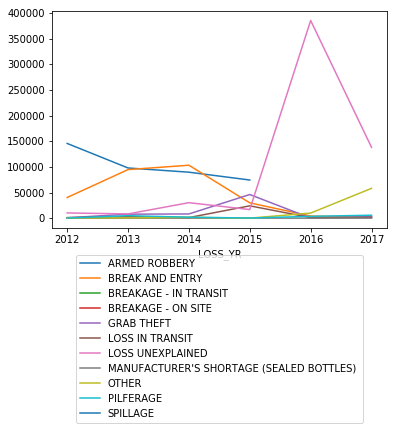

In [96]:
bc_reasons = bc.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
bc_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [97]:
bc_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,PILFERAGE,SPILLAGE
LOSS_YR,,,,,,,,,,,
2012,145743.00,40312.0,NaN,NaN,728.0,1130.0,10216.00,4.0,395.00,196.0,45.0
2013,97918.50,94764.0,NaN,NaN,7795.0,2910.0,8288.00,1.0,500.00,4851.0,NaN
2014,89675.50,103266.0,NaN,NaN,8227.0,1161.0,30229.20,8.0,1627.00,1879.0,NaN
2015,74411.25,29884.5,NaN,NaN,46117.0,24088.0,16825.50,134.5,106.00,284.0,NaN
2016,NaN,4179.0,NaN,NaN,201.0,1086.0,385543.75,10.0,9911.50,3562.0,NaN
2017,25.00,1997.0,7.0,5.0,3142.0,1632.0,138117.15,41.0,58158.95,5775.0,1.0


Most BC losses are from pharmacies.

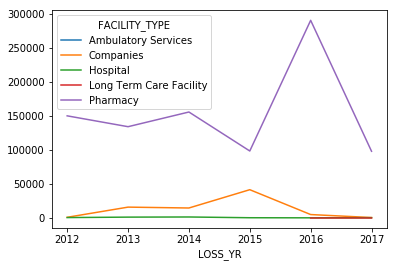

In [98]:
bc_loc = bc_five.pivot_table(index="LOSS_YR", columns='FACILITY_TYPE', values='QUANTITY', aggfunc=np.sum)
bc_loc.plot()

## Alberta

Giving Alberta its own dataframe. Codeine is the drug that's gone missing in the highest quantities.

In [99]:
ab = units[units.PROV_CODE == "AB"]
ab.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
CODEINE                                     309724.50
OXYCODONE                                   211206.75
HYDROMORPHONE                               104636.00
MORPHINE                                     80817.50
LORAZEPAM                                    59300.50
AMPHETAMINE                                  46002.50
METHYLPHENIDATE HCL                          41011.50
CLONAZEPAM                                   36562.00
TEMAZEPAM                                    16792.00
METHADONE                                    16263.00
LISDEXAMFETAMINE DIMESYLATE                  16245.50
DIAZEPAM                                     15828.00
PHENOBARBITAL                                14163.50
NABILONE                                     12314.00
ALPRAZOLAM                                   12224.05
DIPHENOXYLATE                                12085.00
METHYLPHENIDATE                              10834.50
PETHIDINE                                     5257.00
CLOBAZAM       

In [100]:
ab.to_csv("ab.csv")

The amount of drugs reported missing in Alberta seem to have peaked in 2015 and been dropping since. There is a slight increase in the amounts of lorazepam (used to treat anxiety) in 2017.

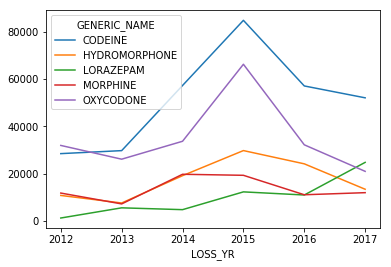

In [101]:
ab_five = ab[(ab.GENERIC_NAME == "OXYCODONE") | (ab.GENERIC_NAME == "CODEINE") | (ab.GENERIC_NAME == "HYDROMORPHONE") | (ab.GENERIC_NAME == "LORAZEPAM") | (ab.GENERIC_NAME == "MORPHINE")]
ab_five_yrs = ab_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
ab_five_yrs.plot()

In [102]:
ab.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
12769,2013-07-16,AB,ACET 3,CODEINE,11100.0,TAB,ARMED ROBBERY,Pharmacy,2013
28848,2015-01-19,AB,APO-OXYCODONE/ACET 5MG,OXYCODONE,7200.0,TAB,LOSS IN TRANSIT,Companies,2015
9040,2013-02-10,AB,PMS-OXYCODONE 20MG TAB,OXYCODONE,6500.0,TAB,PILFERAGE,Pharmacy,2013
27581,2014-12-08,AB,SANDOZ MORPHINE SR 15MG/TAB,MORPHINE,6000.0,TAB,LOSS UNEXPLAINED,Companies,2014
32533,2015-05-02,AB,"PHARMETICS ACETAMINOPHEN, CAFFEINE & CODEINE 8...",CODEINE,5200.0,TAB,ARMED ROBBERY,Pharmacy,2015
4468,2012-06-14,AB,SUPEUDOL 10 MG,OXYCODONE,4061.0,TAB,PILFERAGE,Pharmacy,2012
4467,2012-06-14,AB,SUPEUDOL 20 MG,OXYCODONE,3753.0,TAB,PILFERAGE,Pharmacy,2012
53853,2016-04-23,AB,RATIO-LENOLTEC 1 TAB,CODEINE,3330.0,CAP,BREAK AND ENTRY,Pharmacy,2016
5165,2012-07-23,AB,TYLENOL 3,CODEINE,2978.0,TAB,BREAK AND ENTRY,Pharmacy,2012
35025,2015-07-03,AB,ACETAMINOPHEN 325MG & CODEINE,CODEINE,2800.0,TAB,PILFERAGE,Pharmacy,2015


In [103]:
ab_break = ab[(ab.LOSS_DESC == "BREAK AND ENTRY") | (ab.LOSS_DESC == "ARMED ROBBERY")]

In [104]:
ab_break.groupby("LOSS_YR").QUANTITY.sum().sort_values(ascending=False)

LOSS_YR
2015    237296.0
2014    117604.5
2016    106557.5
2017     82134.5
2012     81070.0
2013     59503.5
Name: QUANTITY, dtype: float64

Codeine also the most commonly stolen in Alberta.

In [105]:
ab_break.groupby("GENERIC_NAME").QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
CODEINE                        220224.5
OXYCODONE                      137164.0
HYDROMORPHONE                   82225.5
MORPHINE                        61095.5
METHYLPHENIDATE HCL             28799.0
AMPHETAMINE                     28316.0
LORAZEPAM                       20676.0
METHADONE                       13357.0
PHENOBARBITAL                   10814.0
DIPHENOXYLATE                    8850.0
DIAZEPAM                         8491.5
NABILONE                         8426.0
LISDEXAMFETAMINE DIMESYLATE      8306.0
TEMAZEPAM                        8153.0
METHYLPHENIDATE                  8052.5
CLONAZEPAM                       7542.0
ALPRAZOLAM                       3547.0
PETHIDINE                        3388.0
BROMAZEPAM                       2102.0
BUTABARBITAL                     1875.0
CHLORDIAZEPOXIDE HCL             1715.0
FENTANYL                         1605.0
TESTOSTERONE UNDECANOATE         1549.0
OXAZEPAM                         1346.0
HYDROCODONE                

The spike in missing drugs in 2015 seems to be a result of significant losses due to break and enters. It's since gone down but even in 2017 break and enters remain responsible for a significant number of Alberta's losses.

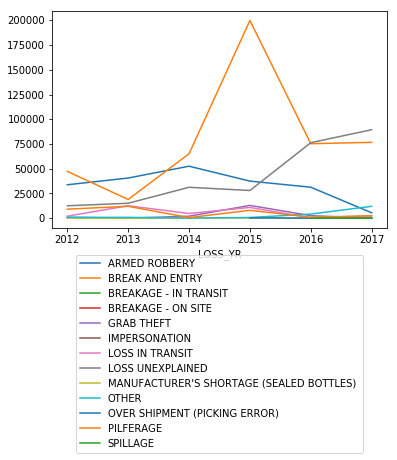

In [106]:
ab_reasons = ab.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
ab_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [107]:
ab_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE
LOSS_YR,,,,,,,,,,,,,
2012,33764.5,47305.5,NaN,1.0,893.0,NaN,2019.0,12514.00,100.0,857.50,NaN,9116.0,NaN
2013,40581.5,18922.0,NaN,NaN,3.0,NaN,12564.0,15072.75,2.0,806.00,NaN,12015.0,NaN
2014,52533.5,65071.0,21069.0,NaN,2013.0,NaN,4724.0,31218.50,67.0,114.00,NaN,576.0,NaN
2015,37472.0,199824.0,NaN,NaN,12914.0,NaN,10874.0,27985.05,158.5,688.00,300.0,7951.0,NaN
2016,31288.0,75269.5,NaN,2.0,2549.0,NaN,373.0,76299.00,75.0,4163.00,30.0,1021.0,5.0
2017,5461.0,76673.5,2.0,5.0,20.0,270.0,2447.0,89421.00,26.0,11993.25,0.0,2329.0,7.0


Most losses in Alberta from pharmacies.

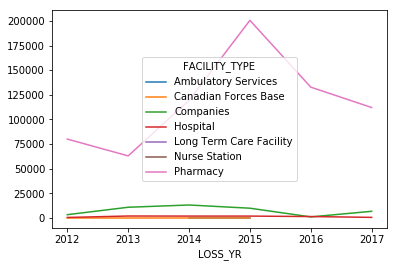

In [108]:
ab_loc = ab_five.pivot_table(index="LOSS_YR", columns='FACILITY_TYPE', values='QUANTITY', aggfunc=np.sum)
ab_loc.plot()

## Quebec

Hydromorphone went missing in Quebec in the largest quantities.

In [109]:
qc = units[units.PROV_CODE == "QC"]
qc.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
HYDROMORPHONE                  204988.60
CODEINE                        137377.25
OXYCODONE                      131554.25
CLONAZEPAM                      67315.75
LORAZEPAM                       55502.00
METHYLPHENIDATE                 50296.50
METHYLPHENIDATE HCL             47988.00
MORPHINE                        36682.25
OXAZEPAM                        29190.26
ALPRAZOLAM                      22722.00
PHENOBARBITAL                   11823.00
CLOBAZAM                        11470.00
AMPHETAMINE                      9937.50
DIAZEPAM                         9631.50
EPHEDRINE HCL                    9000.00
BUTABARBITAL                     8503.00
METHADONE                        8045.50
BROMAZEPAM                       7640.00
LISDEXAMFETAMINE DIMESYLATE      7186.00
NABILONE                         5836.00
FENTANYL                         4958.00
TESTOSTERONE UNDECANOATE         3717.00
TEMAZEPAM                        3053.00
PSEUDOEPHEDRINE HCL              2638.00
TRI

Hydromorphone losses in Quebec are, however, down in 2016-17. In 2017 the drug that went missing in the largest amounts was lorazepam, which is used to treat anxiety disorders and as a sedative.

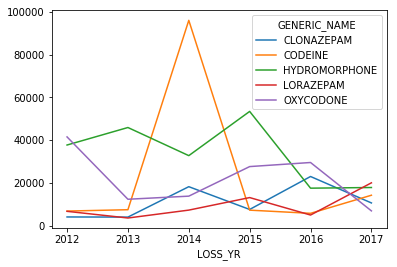

In [110]:
qc_five = qc[(qc.GENERIC_NAME == "OXYCODONE") | (qc.GENERIC_NAME == "CODEINE") | (qc.GENERIC_NAME == "HYDROMORPHONE") | (qc.GENERIC_NAME == "LORAZEPAM") | (qc.GENERIC_NAME == "CLONAZEPAM")]
qc_five_yrs = qc_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
qc_five_yrs.plot()

In [111]:
qc_five_yrs.head(6)

GENERIC_NAME,CLONAZEPAM,CODEINE,HYDROMORPHONE,LORAZEPAM,OXYCODONE
LOSS_YR,,,,,
2012,4038.00,6796.00,37685.00,6671.0,41478.50
2013,3976.00,7425.00,45870.30,3546.0,12318.50
2014,18198.50,96000.00,32720.25,7242.0,13771.00
2015,7546.50,7221.00,53400.00,13102.5,27599.75
2016,22961.00,5736.00,17502.30,4938.5,29507.00
2017,10595.75,14199.25,17810.75,20002.0,6879.50


The biggest single loss in Quebec was 86,400 tablets of codeine that were lost in transit in 2014. That accounts for much of the codeine reported missing in the province and the spike in losses in 2014.

In [112]:
qc.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
19487,2014-04-08,QC,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,86400.00,TAB,LOSS IN TRANSIT,Companies,2014
5202,2012-07-27,QC,SUPEUDOL 10 MG,OXYCODONE,13000.00,TAB,PILFERAGE,Pharmacy,2012
77943,2016-12-19,QC,CLONAZEPAM 0.5MG,CLONAZEPAM,12948.00,TAB,LOSS UNEXPLAINED,Pharmacy,2016
44477,2016-01-04,QC,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,12000.00,TAB,LOSS UNEXPLAINED,Companies,2016
20162,2014-05-01,QC,PMS METHYLPHENIDATE 10MG,METHYLPHENIDATE,10266.00,TAB,PILFERAGE,Pharmacy,2014
40608,2015-10-28,QC,DILAUDID 4 MG,HYDROMORPHONE,9833.00,TAB,PILFERAGE,Pharmacy,2015
51105,2016-03-30,QC,EPHEDRINE 8MG TAB,EPHEDRINE HCL,9000.00,TAB,LOSS UNEXPLAINED,Companies,2016
8797,2013-01-28,QC,OXAZEPAM 30 TAB,OXAZEPAM,8940.00,TAB,PILFERAGE,Pharmacy,2013
20158,2014-05-01,QC,PMS METHYLPHENIDATE 20MG,METHYLPHENIDATE,8360.00,TAB,PILFERAGE,Pharmacy,2014
9512,2013-03-11,QC,PMS-CLOBAZAM 10MG TAB,CLOBAZAM,7310.00,TAB,LOSS UNEXPLAINED,Companies,2013


Most Quebec losses unexplained. Pilferage a significant factor as well.

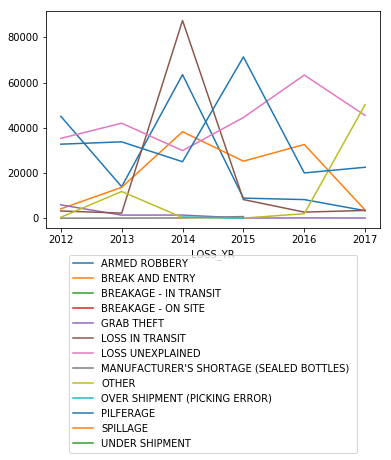

In [113]:
qc_reasons = qc.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
qc_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [114]:
qc_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,SPILLAGE,UNDER SHIPMENT
LOSS_YR,,,,,,,,,,,,,
2012,45078.0,4135.0,65.0,17.0,5881.0,3176.0,35292.50,4.0,396.0,NaN,32728.0,4.0,NaN
2013,13909.0,13641.0,NaN,NaN,1348.0,2242.5,42008.31,24.0,11806.0,NaN,33762.0,NaN,NaN
2014,63474.0,38241.0,756.0,953.0,1382.0,87432.0,29882.50,87.0,255.0,500.0,24966.0,NaN,100.0
2015,8866.0,25201.0,NaN,NaN,37.0,8223.0,44521.75,716.0,38.0,10.0,71327.0,NaN,NaN
2016,8220.5,32591.0,NaN,NaN,123.0,2683.8,63296.30,NaN,1972.5,NaN,20016.0,NaN,NaN
2017,3318.0,3553.0,NaN,1.0,67.0,3418.0,45415.75,NaN,50256.0,NaN,22515.5,69.5,NaN


More losses from transport companies in Quebec relative to other provinces.

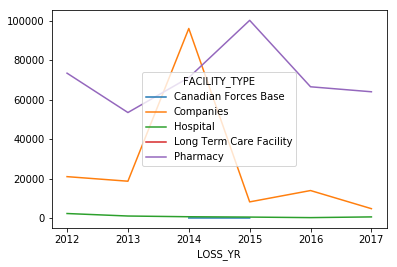

In [115]:
qc_loc = qc_five.pivot_table(index="LOSS_YR", columns='FACILITY_TYPE', values='QUANTITY', aggfunc=np.sum)
qc_loc.plot()

## Newfoundland and Labrador

Oxycodone more than twice as likely to go missing than any other drug.

In [116]:
nl = units[units.PROV_CODE == "NL"]
nl.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                      141242.5
CODEINE                         69429.5
METHYLPHENIDATE HCL             38542.5
MORPHINE                        31577.5
METHYLPHENIDATE                 25029.0
HYDROMORPHONE                   23917.5
PHENOBARBITAL                   23554.0
BUTABARBITAL                    20332.0
PETHIDINE                       16472.0
LORAZEPAM                       12032.0
AMPHETAMINE                     10421.0
CODEINE & BUTALBITAL             7309.0
DIPHENOXYLATE                    5348.0
CLONAZEPAM                       4532.5
LISDEXAMFETAMINE DIMESYLATE      4056.0
NABILONE                         3880.0
TEMAZEPAM                        1230.0
BUTALBITAL                       1128.0
METHADONE                        1037.0
DIAZEPAM                          919.0
BROMAZEPAM                        870.5
TESTOSTERONE UNDECANOATE          620.0
ALPRAZOLAM                        586.0
BUPRENORPHINE                     579.0
FENTANYL                   

In [117]:
nl.to_csv("nl.csv")

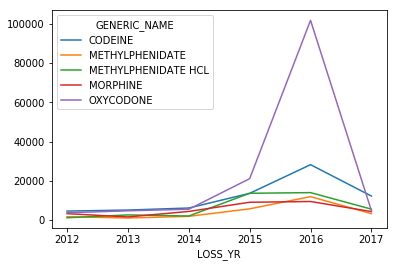

In [118]:
nl_five = nl[(nl.GENERIC_NAME == "OXYCODONE") | (nl.GENERIC_NAME == "CODEINE") | (nl.GENERIC_NAME == "METHYLPHENIDATE HCL") | (nl.GENERIC_NAME == "MORPHINE") | (nl.GENERIC_NAME == "METHYLPHENIDATE")]
nl_five_yrs = nl_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
nl_five_yrs.plot()

In [119]:
nl_five_yrs.head(6)

GENERIC_NAME,CODEINE,METHYLPHENIDATE,METHYLPHENIDATE HCL,MORPHINE,OXYCODONE
LOSS_YR,,,,,
2012,4491.0,1616.5,1090.0,3175.0,3617.0
2013,5014.0,950.0,2521.0,1502.0,4627.5
2014,6051.0,1795.5,1971.0,4299.0,5424.0
2015,13539.0,5639.5,13576.0,8994.0,21039.0
2016,28178.0,11859.0,13916.5,9374.5,101862.5
2017,12156.5,3168.5,5468.0,4233.0,4672.5


Definitely something weird going on in 2016.

In [120]:
nl.groupby('LOSS_YR').QUANTITY.sum()

LOSS_YR
2012     20845.5
2013     35225.5
2014     28026.5
2015     86104.5
2016    232402.0
2017     45689.5
Name: QUANTITY, dtype: float64

The data from Newfoundland is patchy. Massive amounts of drugs reported pilfered in 2016 and a little bit in 2015 but nothing any other year. Reporting on this seems inconsistent. Also a spike in the amount lost to armed robbery in 2016.

In [121]:
nl.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
53717,2016-04-21,NL,PMS-OXYCODONE 20MG TAB,OXYCODONE,55400.0,TAB,PILFERAGE,Pharmacy,2016
63416,2016-06-23,NL,RATIO-TECNAL C 1/2 CAP,BUTABARBITAL,17520.0,CAP,PILFERAGE,Pharmacy,2016
53720,2016-04-21,NL,OXY-IR 20MG,OXYCODONE,11380.0,TAB,PILFERAGE,Pharmacy,2016
53714,2016-04-21,NL,DEMEROL 50MG,PETHIDINE,8990.0,TAB,PILFERAGE,Pharmacy,2016
53722,2016-04-21,NL,SUPEUDOL 20 MG,OXYCODONE,8350.0,TAB,PILFERAGE,Pharmacy,2016
53715,2016-04-21,NL,TYLENOL 4,CODEINE,7690.0,TAB,PILFERAGE,Pharmacy,2016
53716,2016-04-21,NL,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,7620.0,TAB,PILFERAGE,Pharmacy,2016
35832,2015-07-23,NL,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,6800.0,TAB,PILFERAGE,Pharmacy,2015
63415,2016-06-23,NL,FIORINAL C1/2,CODEINE & BUTALBITAL,5342.0,CAP,PILFERAGE,Pharmacy,2016
35830,2015-07-23,NL,APO-METHYLPHENIDATE 10MG/TAB,METHYLPHENIDATE HCL,5300.0,TAB,PILFERAGE,Pharmacy,2015


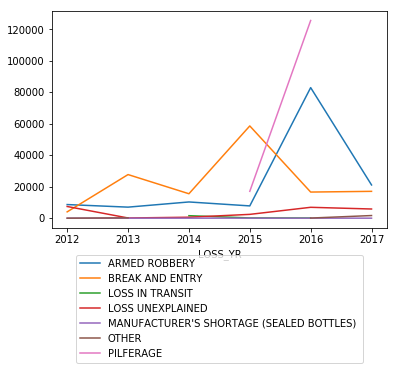

In [122]:
nl_reasons = nl.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
nl_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [123]:
nl_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,PILFERAGE
LOSS_YR,,,,,,,
2012,8651.0,4009.0,750.0,7431.5,3.0,1.0,NaN
2013,7017.0,27722.0,NaN,119.0,4.0,211.5,152.0
2014,10310.0,15534.0,1580.0,600.5,2.0,NaN,NaN
2015,7802.0,58644.0,152.0,2419.5,18.0,NaN,17069.0
2016,83011.5,16604.0,120.0,6911.5,2.0,75.0,125678.0
2017,21122.0,17060.5,NaN,5831.0,4.0,1672.0,NaN


## Manitoba

Codeine by far the most common drug to go missing in Manitoba.

In [124]:
mb = units[units.PROV_CODE == "MB"]
mb.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
CODEINE                        109677.00
OXYCODONE                       58230.00
EPHEDRINE HCL                   40000.00
HYDROMORPHONE                   21971.05
LORAZEPAM                       20142.50
MORPHINE                        13091.75
PSEUDOEPHEDRINE                 10926.00
PSEUDOEPHEDRINE HCL              9998.00
CLONAZEPAM                       9807.50
METHYLPHENIDATE HCL              8907.00
ALPRAZOLAM                       6552.50
DIAZEPAM                         6035.00
AMPHETAMINE                      4206.50
PHENOBARBITAL                    3527.00
TEMAZEPAM                        2884.00
METHYLPHENIDATE                  2864.50
NABILONE                         2617.00
EPHEDRINE                        1800.00
LISDEXAMFETAMINE DIMESYLATE      1608.00
BROMAZEPAM                       1532.00
METHADONE                        1290.44
OXAZEPAM                         1216.00
DIPHENOXYLATE                     989.19
TESTOSTERONE UNDECANOATE          790.00
CHL

Codeine reported missing in the highest quantities but lorazepam and hydromorphone are the ones that are increasing.

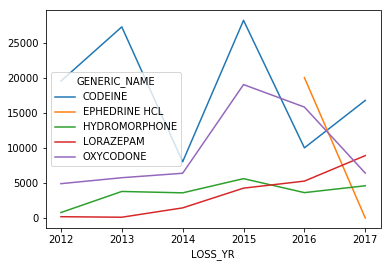

In [125]:
mb_five = mb[(mb.GENERIC_NAME == "OXYCODONE") | (mb.GENERIC_NAME == "CODEINE") | (mb.GENERIC_NAME == "HYDROMORPHONE") | (mb.GENERIC_NAME == "LORAZEPAM") | (mb.GENERIC_NAME == "EPHEDRINE HCL")]
mb_five_yrs = mb_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
mb_five_yrs.plot()

In [126]:
mb_five_yrs.head(6)

GENERIC_NAME,CODEINE,EPHEDRINE HCL,HYDROMORPHONE,LORAZEPAM,OXYCODONE
LOSS_YR,,,,,
2012,19504.0,NaN,779.00,186.0,4894.0
2013,27236.0,20000.0,3784.00,111.0,5742.0
2014,8016.0,NaN,3586.50,1443.0,6377.0
2015,28166.0,NaN,5609.50,4254.0,19012.0
2016,9997.0,20000.0,3617.50,5257.0,15806.0
2017,16758.0,0.0,4594.55,8891.5,6399.0


Manitoba's quantities reported missing are all over the place.

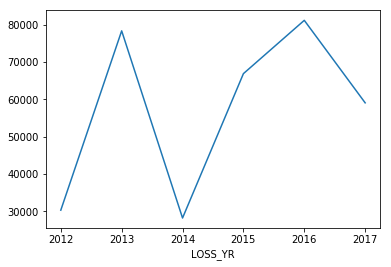

In [127]:
mb_yrs = mb.groupby('LOSS_YR').QUANTITY.sum()
mb_yrs.plot()

In [153]:
mb_yrs.head(6)

LOSS_YR
2012    30338.00
2013    78328.00
2014    28239.50
2015    66874.69
2016    81140.75
2017    59060.99
Name: QUANTITY, dtype: float64

None of the big losses in Manitoba are all that recent and the two biggest were losses in transit.

In [128]:
mb.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
9264,2013-02-28,MB,EPHEDRINE 8MG TAB,EPHEDRINE HCL,20000.00,TAB,LOSS IN TRANSIT,Companies,2013
46690,2016-02-08,MB,EPHEDRINE 8MG TAB,EPHEDRINE HCL,20000.00,PKG,LOSS IN TRANSIT,Companies,2016
14336,2013-09-27,MB,TYLENOL 1,CODEINE,18232.00,TAB,LOSS UNEXPLAINED,Companies,2013
494,2012-01-17,MB,RATIO-LENOLTEC 1 TAB,CODEINE,12000.00,TAB,LOSS IN TRANSIT,Companies,2012
44138,2015-12-28,MB,TYLENOL 3,CODEINE,11000.00,TAB,ARMED ROBBERY,Pharmacy,2015
14302,2013-09-24,MB,PSEUDOEPHEDRINE,PSEUDOEPHEDRINE,9600.00,TAB,LOSS UNEXPLAINED,Companies,2013
14301,2013-09-24,MB,SINUTAB SINUS ALLERGY 30MG CAPLETS,PSEUDOEPHEDRINE HCL,9600.00,TAB,LOSS UNEXPLAINED,Companies,2013
37121,2015-08-24,MB,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,5903.00,TAB,LOSS UNEXPLAINED,Pharmacy,2015
38632,2015-09-21,MB,RATIO-LENOLTEC 1 TAB,CODEINE,4800.00,TAB,LOSS UNEXPLAINED,Companies,2015
19177,2014-03-28,MB,TYLENOL 3,CODEINE,4500.00,TAB,BREAK AND ENTRY,Pharmacy,2014


Unexplained losses increased in 2017.

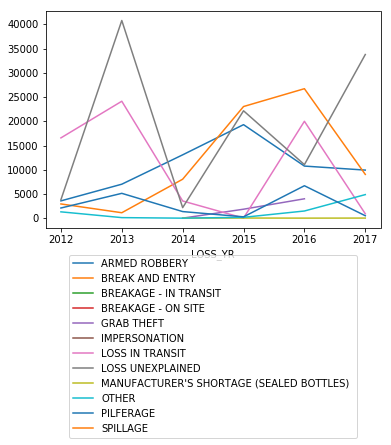

In [129]:
mb_reasons = mb.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
mb_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [130]:
mb_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,PILFERAGE,SPILLAGE
LOSS_YR,,,,,,,,,,,,
2012,3571.0,2937.0,NaN,NaN,30.0,NaN,16574.0,3814.00,5.0,1308.0,2099.0,NaN
2013,7014.0,1125.0,NaN,NaN,NaN,NaN,24140.0,40806.00,NaN,115.0,5128.0,NaN
2014,13075.0,8043.0,1.0,NaN,7.0,NaN,3549.5,2177.50,19.0,3.0,1363.5,1.0
2015,19305.0,23047.0,NaN,NaN,1852.0,NaN,20.0,22166.69,31.0,176.0,277.0,NaN
2016,10754.0,26727.0,NaN,NaN,4001.0,418.0,20000.0,11053.25,9.0,1481.5,6696.0,1.0
2017,9927.0,9037.0,1.0,14.0,NaN,NaN,909.0,33782.49,20.0,4865.5,505.0,NaN


In [131]:
mb.to_csv("mb.csv")

## New Brunswick

In [132]:
nb = units[units.PROV_CODE == "NB"]
nb.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
OXYCODONE                      19560.5
LORAZEPAM                      18365.0
HYDROMORPHONE                  16102.5
CODEINE                        14947.0
CLONAZEPAM                     11825.0
MORPHINE                        9086.0
ALPRAZOLAM                      7610.5
METHYLPHENIDATE HCL             3336.0
DIAZEPAM                        3072.0
TEMAZEPAM                       1847.0
PETHIDINE                       1816.0
OXAZEPAM                        1784.0
NABILONE                        1548.0
BROMAZEPAM                      1393.0
METHYLPHENIDATE                 1315.0
LISDEXAMFETAMINE DIMESYLATE     1235.0
AMPHETAMINE                     1084.0
PSEUDOEPHEDRINE HCL             1072.0
PHENOBARBITAL                    824.0
CHLORDIAZEPOXIDE HCL             798.0
ZOLPIDEM                         610.0
TRIAZOLAM                        603.0
NITRAZEPAM                       568.0
CLOBAZAM                         493.0
METHADONE                        422.0
DIPHENOXYLAT

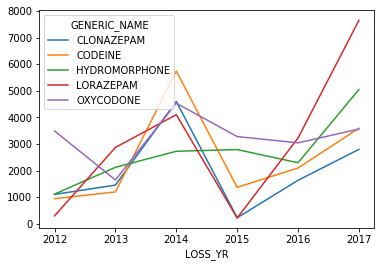

In [133]:
nb_five = nb[(nb.GENERIC_NAME == "OXYCODONE") | (nb.GENERIC_NAME == "CODEINE") | (nb.GENERIC_NAME == "HYDROMORPHONE") | (nb.GENERIC_NAME == "LORAZEPAM") | (nb.GENERIC_NAME == "CLONAZEPAM")]
nb_five_yrs = nb_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
nb_five_yrs.plot()

In [134]:
nb_five_yrs.head(6)

GENERIC_NAME,CLONAZEPAM,CODEINE,HYDROMORPHONE,LORAZEPAM,OXYCODONE
LOSS_YR,,,,,
2012,1105.0,945.0,1116.0,298.0,3491.0
2013,1456.0,1199.0,2124.0,2871.0,1649.0
2014,4600.0,5739.0,2727.0,4103.0,4535.0
2015,229.0,1371.0,2791.0,218.0,3280.0
2016,1636.0,2098.5,2296.0,3225.0,3044.0
2017,2799.0,3594.5,5048.5,7650.0,3561.5


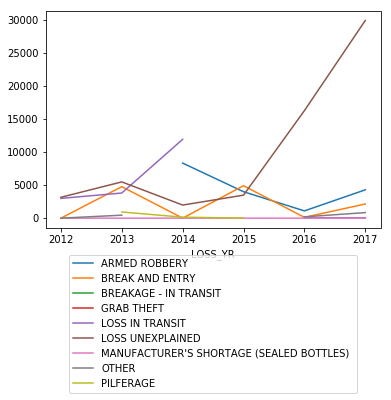

In [135]:
nb_reasons = nb.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
nb_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [136]:
nb_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,GRAB THEFT,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,PILFERAGE
LOSS_YR,,,,,,,,,
2012,1980.0,4.0,NaN,1775.0,2990.0,3157.0,1.0,2.0,NaN
2013,NaN,4758.0,NaN,NaN,3800.0,5478.0,1.0,452.0,939.0
2014,8316.0,5.0,9080.0,NaN,11910.0,1980.0,2.0,NaN,150.0
2015,3994.0,4900.0,NaN,NaN,NaN,3480.0,3.0,NaN,15.0
2016,1100.0,126.0,NaN,NaN,60.0,16241.0,4.0,199.0,NaN
2017,4281.0,2143.0,NaN,NaN,60.0,29852.5,5.0,841.0,3.0


In [137]:
nb.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
17906,2014-02-28,NB,PMS CLONAZEPAM 0.5MG TAB,CLONAZEPAM,2000.00,TAB,BREAKAGE - IN TRANSIT,Companies,2014
17891,2014-02-28,NB,CLONAZEPAM 0.5MG,CLONAZEPAM,2000.00,TAB,LOSS IN TRANSIT,Companies,2014
5225,2012-07-30,NB,ENDOCET,OXYCODONE,1775.00,TAB,GRAB THEFT,Pharmacy,2012
17882,2014-02-28,NB,LORAZEPAM 2 MG TAB,LORAZEPAM,1000.00,TAB,LOSS IN TRANSIT,Companies,2014
17883,2014-02-28,NB,LORAZEPAM 1 MG TAB,LORAZEPAM,1000.00,TAB,LOSS IN TRANSIT,Companies,2014
17889,2014-02-28,NB,ATASOL 30,CODEINE,1000.00,TAB,LOSS IN TRANSIT,Companies,2014
17894,2014-02-28,NB,ALPRAZOLAM 0.25 MG,ALPRAZOLAM,1000.00,TAB,LOSS IN TRANSIT,Companies,2014
17895,2014-02-28,NB,ALPRAZOLAM 0.5MG,ALPRAZOLAM,1000.00,TAB,LOSS IN TRANSIT,Companies,2014
17898,2014-02-28,NB,LORAZEPAM 2 MG TAB,LORAZEPAM,1000.00,TAB,BREAKAGE - IN TRANSIT,Companies,2014
4970,2012-07-10,NB,RATIO-OXYCOCET 5MG/TAB,OXYCODONE,1000.00,TAB,LOSS IN TRANSIT,Companies,2012


In [138]:
nb.to_csv("nb.csv")

## Nova Scotia

In Nova Scotia hydromorphone and codeine were reported missing in roughly equal quantities.

In [139]:
ns = units[units.PROV_CODE == "NS"]
ns.groupby('GENERIC_NAME').QUANTITY.sum().sort_values(ascending=False)

GENERIC_NAME
HYDROMORPHONE                  37572.25
CODEINE                        37088.00
OXYCODONE                      29663.25
MORPHINE                       13575.00
METHYLPHENIDATE HCL             9253.50
LORAZEPAM                       9065.50
CLONAZEPAM                      7913.50
METHYLPHENIDATE                 7701.50
AMPHETAMINE                     6385.50
PHENOBARBITAL                   4316.00
NABILONE                        2699.00
PETHIDINE                       2630.40
DIAZEPAM                        2417.75
BUTABARBITAL                    2221.00
DIPHENOXYLATE                   1990.00
LISDEXAMFETAMINE DIMESYLATE     1740.00
METHADONE                       1738.00
ALPRAZOLAM                      1688.00
OXAZEPAM                        1592.50
TESTOSTERONE UNDECANOATE        1329.00
HYDROCODONE                      837.00
FENTANYL                         711.00
TEMAZEPAM                        610.00
BROMAZEPAM                       573.50
PENTAZOCINE                

The story in Nova Scotia seems to be codeine losses. Everything else is way down. It has replaced oxycodone as the drug that goes missing in the highest quantities.

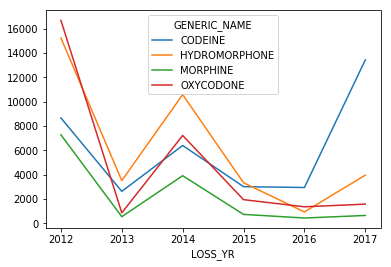

In [140]:
ns_five = ns[(ns.GENERIC_NAME == "OXYCODONE") | (ns.GENERIC_NAME == "CODEINE") | (ns.GENERIC_NAME == "HYDROMORPHONE") | (ns.GENERIC_NAME == "MORPHINE")]
ns_five_yrs = ns_five.pivot_table(index="LOSS_YR", columns='GENERIC_NAME', values='QUANTITY', aggfunc=np.sum)
ns_five_yrs.plot()

In [141]:
ns_five_yrs.head(6)

GENERIC_NAME,CODEINE,HYDROMORPHONE,MORPHINE,OXYCODONE
LOSS_YR,,,,
2012,8664.0,15232.00,7276.0,16681.00
2013,2631.0,3515.00,551.0,867.00
2014,6401.0,10579.00,3918.0,7221.75
2015,3016.5,3341.50,738.0,1949.50
2016,2948.5,939.75,441.5,1362.50
2017,13427.0,3965.00,650.5,1581.50


Most losses unexplained.

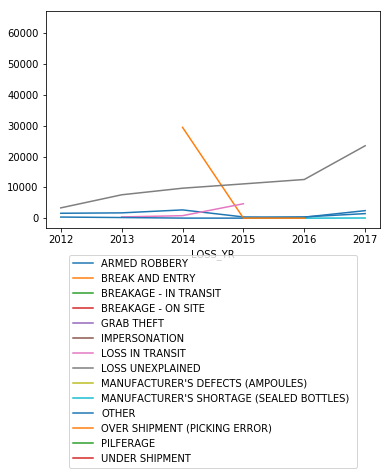

In [142]:
ns_reasons = ns.pivot_table(index="LOSS_YR", columns="LOSS_DESC", values="QUANTITY",aggfunc=np.sum)
ns_reasons.plot()
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [143]:
ns_reasons.head(6)

LOSS_DESC,ARMED ROBBERY,BREAK AND ENTRY,BREAKAGE - IN TRANSIT,BREAKAGE - ON SITE,GRAB THEFT,IMPERSONATION,LOSS IN TRANSIT,LOSS UNEXPLAINED,MANUFACTURER'S DEFECTS (AMPOULES),MANUFACTURER'S SHORTAGE (SEALED BOTTLES),OTHER,OVER SHIPMENT (PICKING ERROR),PILFERAGE,UNDER SHIPMENT
LOSS_YR,,,,,,,,,,,,,,
2012,1592.0,64178.0,NaN,NaN,NaN,NaN,NaN,3342.00,NaN,NaN,362.0,NaN,5901.0,NaN
2013,1723.0,NaN,NaN,NaN,8.0,NaN,401.0,7590.00,NaN,4.0,211.0,NaN,NaN,NaN
2014,2684.0,29493.0,NaN,NaN,NaN,180.0,811.0,9731.75,NaN,NaN,21.0,NaN,2005.0,NaN
2015,395.0,20.0,NaN,NaN,NaN,NaN,4680.0,11128.65,NaN,5.0,7.0,21.0,NaN,NaN
2016,330.0,NaN,NaN,NaN,10.0,NaN,NaN,12557.75,NaN,7.0,399.0,1.0,340.0,1.0
2017,2447.0,293.0,1.0,21.0,NaN,NaN,100.0,23509.50,1.0,56.0,1484.0,NaN,NaN,NaN


The biggest single losses in Nova Scotia.

In [144]:
ns.sort_values("QUANTITY", ascending=False)

,LOSS_DATE,PROV_CODE,DRUG_NAME,GENERIC_NAME,QUANTITY,UNIT_CODE,LOSS_DESC,FACILITY_TYPE,LOSS_YR
7495,2012-11-22,NS,ENDOCET,OXYCODONE,5510.0,TAB,PILFERAGE,Pharmacy,2012
75158,2016-09-24,NS,PMS CLONAZEPAM 0.25MG TAB,CLONAZEPAM,1600.0,TAB,LOSS UNEXPLAINED,Pharmacy,2016
21604,2014-06-18,NS,METHYLPHENIDATE 10MG TAB,METHYLPHENIDATE,1585.0,TAB,BREAK AND ENTRY,Pharmacy,2014
1943,2012-03-03,NS,ENDOCET,OXYCODONE,1421.0,TAB,BREAK AND ENTRY,Pharmacy,2012
1944,2012-03-03,NS,DILAUDID 4 MG,HYDROMORPHONE,1418.0,TAB,BREAK AND ENTRY,Pharmacy,2012
127294,2017-07-21,NS,RATIO-LENOLTEC 1 TAB,CODEINE,1200.0,TAB,LOSS UNEXPLAINED,Pharmacy,2017
11577,2013-06-04,NS,ACETAMINOPHEN CAFFEINE & CODEINE 8MG TAB,CODEINE,1200.0,TAB,LOSS UNEXPLAINED,Companies,2013
134944,2017-08-25,NS,RATIO-LENOLTEC 1 TAB,CODEINE,1200.0,TAB,LOSS UNEXPLAINED,Pharmacy,2017
134945,2017-08-25,NS,RATIO-LENOLTEC 1 TAB,CODEINE,1200.0,TAB,LOSS UNEXPLAINED,Pharmacy,2017
121748,2017-06-29,NS,RATIO-LENOLTEC 1 TAB,CODEINE,1200.0,TAB,LOSS UNEXPLAINED,Pharmacy,2017


In [145]:
ns.to_csv("ns.csv")

## Cannabis

Assigning cannabis its own dataframe.

In [146]:
pot = drugs[drugs.GENERIC_NAME == "CANNABIS"]
pot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 1173 to 142259
Data columns (total 9 columns):
LOSS_DATE        1255 non-null datetime64[ns]
PROV_CODE        1255 non-null object
DRUG_NAME        1255 non-null object
GENERIC_NAME     1255 non-null object
QUANTITY         1255 non-null float64
UNIT_CODE        1255 non-null object
LOSS_DESC        1255 non-null object
FACILITY_TYPE    1255 non-null object
LOSS_YR          1255 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 98.0+ KB


Most cannabis measured in grams.

In [147]:
pot.UNIT_CODE.value_counts()

GRA    1214
MLS      29
CAP       6
PLT       4
SED       2
Name: UNIT_CODE, dtype: int64

In [148]:
pot = pot[pot.UNIT_CODE == "GRA"]
pot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 1173 to 142259
Data columns (total 9 columns):
LOSS_DATE        1214 non-null datetime64[ns]
PROV_CODE        1214 non-null object
DRUG_NAME        1214 non-null object
GENERIC_NAME     1214 non-null object
QUANTITY         1214 non-null float64
UNIT_CODE        1214 non-null object
LOSS_DESC        1214 non-null object
FACILITY_TYPE    1214 non-null object
LOSS_YR          1214 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 94.8+ KB


Almost all cannabis reported lost was in BC or Ontario. Believe these were the only provinces that had licensed producers at the time.

In [149]:
pot.groupby("PROV_CODE").QUANTITY.sum()

PROV_CODE
BC            18110.50
NB               94.00
ON            17905.34
s.20(1)(c)     1020.00
s.20(1)c       3615.20
Name: QUANTITY, dtype: float64

In [150]:
pot.groupby("FACILITY_TYPE").QUANTITY.sum()

FACILITY_TYPE
Companies              1245.00
Licensed Producers    39500.04
Name: QUANTITY, dtype: float64

Most cannabis was lost in transit. Quite a bit went missing due to impersonation -- people pretending to be someone who had a medical license. Most went missing in 2016 as this was when changes to federal rules and pending decriminalization were announced.

In [151]:
pot.groupby("LOSS_DESC").QUANTITY.sum()

LOSS_DESC
BREAK AND ENTRY        20.00
GRAB THEFT             30.00
IMPERSONATION       11990.00
LOSS IN TRANSIT     27520.04
LOSS UNEXPLAINED     1004.00
OTHER                 171.00
PILFERAGE              10.00
Name: QUANTITY, dtype: float64

In [152]:
pot.groupby("LOSS_YR").QUANTITY.sum()

LOSS_YR
2012      205.00
2013      580.00
2014      963.00
2015     3506.00
2016    25303.04
2017    10188.00
Name: QUANTITY, dtype: float64